In [19]:
# Import libraries

import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [20]:
#Read dataset
#df = pd.read_csv('https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD')
df = pd.read_csv(r'C:\Users\tadeo\Desktop\CA1-Sem2\Motor_Vehicle_Collisions_-_Crashes.csv')
df1 = pd.read_csv(r'C:\Users\tadeo\Desktop\CA1-Sem2\Motor_Vehicle_Collisions_-_Crashes.csv')

In [21]:
#Create a copy
df_c = df

# Check shape

df.shape

(2074472, 29)

In [22]:
# Drop dubplicate columns

df.drop_duplicates(inplace = True)

In [23]:
# Check shape

df.shape

(2074472, 29)

In [24]:
# Check null values

df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           645440
ZIP CODE                          645690
LATITUDE                          233572
LONGITUDE                         233572
LOCATION                          233572
ON STREET NAME                    440311
CROSS STREET NAME                 783952
OFF STREET NAME                  1726534
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6796
CONTRIBUTING FACTOR VEHICLE 2     321520
CONTRIBUTING FACTOR VEHICLE 3    1926277
CONTRIBUTING FACTOR VEHICLE 4    2041022
CONTRIBUTING FACTOR VEHICLE 5    2065410
COLLISION_ID                           0
VEHICLE TYPE COD

In [25]:
# Drop unecessary columns & the ones with too many null values

df.drop(columns = ['COLLISION_ID', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 
                   'VEHICLE TYPE CODE 5', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 3',
                   'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'LATITUDE', 
                   'LONGITUDE', 'CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 2',
                   'LOCATION'],inplace = True)

In [26]:
# Check again if there are any null values
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          645440
ZIP CODE                         645690
ON STREET NAME                   440311
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6796
VEHICLE TYPE CODE 1               13675
dtype: int64

In [27]:
# Drop null values

df.dropna(inplace = True)

df.shape

(1106481, 15)

In [28]:
# Reset index

df.reset_index(drop=True,inplace=True)

In [29]:
# Merge crash date & time
df['CRASH DATE'] = df['CRASH DATE'] + ' ' + df['CRASH TIME']

In [31]:
df.drop(columns = ['CRASH TIME'], inplace = True)
df.head()

,CRASH DATE,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,12/14/2021 14:58,MANHATTAN,10017.0,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
1,12/14/2021 16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Sedan
2,12/14/2021 23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Sedan
3,12/11/2021 19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,1.0,0.0,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle
4,12/13/2021 6:30,QUEENS,11372.0,82 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Sedan


In [32]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y %H:%M')

In [33]:
df

,CRASH DATE,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,2021-12-14 14:58:00,MANHATTAN,10017.0,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
1,2021-12-14 16:50:00,QUEENS,11413.0,SPRINGFIELD BOULEVARD,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Sedan
2,2021-12-14 23:10:00,QUEENS,11434.0,NORTH CONDUIT AVENUE,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Sedan
3,2021-12-11 19:43:00,BRONX,10463.0,WEST KINGSBRIDGE ROAD,1.0,0.0,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle
4,2021-12-13 06:30:00,QUEENS,11372.0,82 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106476,2024-03-18 15:30:00,BRONX,10457.0,CLAREMONT PARKWAY,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Station Wagon/Sport Utility Vehicle
1106477,2024-03-18 16:00:00,BROOKLYN,11203.0,EAST 53 STREET,1.0,0.0,0,0,0,0,1,0,Unspecified,Sedan
1106478,2024-03-16 04:40:00,BRONX,10454.0,EAST 135 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan
1106479,2024-03-17 14:56:00,BROOKLYN,11222.0,MANHATTAN AVENUE,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Moped


In [36]:
df=df.sort_values(by=['CRASH DATE'])

In [45]:
df.head()

,CRASH DATE,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
1045418,2012-07-01 00:05:00,MANHATTAN,10036,11 AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,PASSENGER VEHICLE
1045097,2012-07-01 00:10:00,BROOKLYN,11223,WEST 3 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,PASSENGER VEHICLE
1042757,2012-07-01 00:20:00,BROOKLYN,11215,4 AVENUE,0.0,0.0,0,0,0,0,0,0,Prescription Medication,UNKNOWN
1045850,2012-07-01 00:22:00,BRONX,10451,EAST 161 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
1044940,2012-07-01 00:23:00,BROOKLYN,11234,STRICKLAND AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE


KeyboardInterrupt: 

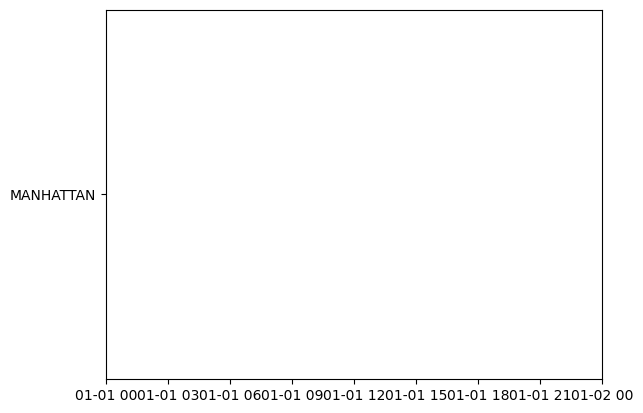

In [47]:
sns.lineplot(data=df, x='CRASH DATE', y='BOROUGH')
plt.show()

In [13]:
df1.sort_values(by='CRASH DATE')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
969522,01/01/2013,4:33,MANHATTAN,10001,WEST 32 STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
973866,01/01/2013,3:20,BROOKLYN,11219,53 STREET,1.0,0.0,0,0,0,0,1,0,Other Vehicular,PASSENGER VEHICLE
977906,01/01/2013,15:03,MANHATTAN,10119,AVENUE OF THE AMERICAS,0.0,0.0,0,0,0,0,0,0,Prescription Medication,PASSENGER VEHICLE
968130,01/01/2013,0:01,QUEENS,11369,86 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
977619,01/01/2013,5:24,BROOKLYN,11203,UTICA AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098812,12/31/2023,16:44,BROOKLYN,11233.0,RALPH AVENUE,3.0,0.0,3,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
1098989,12/31/2023,0:38,MANHATTAN,10006.0,ALBANY STREET,0.0,0.0,0,0,0,0,0,0,Other Vehicular,Sedan
1098799,12/31/2023,17:35,STATEN ISLAND,10308.0,HYLAN BOULEVARD,1.0,0.0,0,0,0,0,1,0,Cell Phone (hand-Held),Station Wagon/Sport Utility Vehicle
1098785,12/31/2023,4:16,BROOKLYN,11237.0,JOHNSON AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan


In [12]:
# Make crash date a date 
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [13]:
df['CRASH DATE']

0         2021-12-14
1         2021-12-14
2         2021-12-14
3         2021-12-11
4         2021-12-13
             ...    
1106476   2024-03-18
1106477   2024-03-18
1106478   2024-03-16
1106479   2024-03-17
1106480   2024-03-18
Name: CRASH DATE, Length: 1106481, dtype: datetime64[ns]

In [14]:
df.sort_values(by='CRASH DATE')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
1045278,2012-07-01,12:20,QUEENS,11377,31 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
1045513,2012-07-01,13:20,MANHATTAN,10029,EAST 97 STREET,0.0,0.0,0,0,0,0,0,0,Other Vehicular,PASSENGER VEHICLE
1043259,2012-07-01,3:58,MANHATTAN,10002,EAST HOUSTON STREET,0.0,0.0,0,0,0,0,0,0,Passenger Distraction,PASSENGER VEHICLE
1045196,2012-07-01,8:00,QUEENS,11004,LANGSTON AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
1044954,2012-07-01,10:20,MANHATTAN,10029,EAST 106 STREET,0.0,0.0,0,0,0,0,0,0,Physical Disability,PASSENGER VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106411,2024-03-18,4:19,BROOKLYN,11201.0,FLATBUSH AVENUE EXTENSION,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Stake or Rack
1106410,2024-03-18,10:30,BROOKLYN,11206.0,SEIGEL STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,USPS Mail
1106409,2024-03-18,20:10,MANHATTAN,10002.0,FDR DRIVE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan
1106418,2024-03-18,11:16,BROOKLYN,11218.0,40 STREET,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle


In [19]:
df['CRASH DATE'] = df['CRASH DATE'].dt.strftime('%Y/%m/%d')

In [20]:
df

0          2021/12/14
1          2021/12/14
2          2021/12/14
3          2021/12/11
4          2021/12/13
              ...    
1106476    2024/03/18
1106477    2024/03/18
1106478    2024/03/16
1106479    2024/03/17
1106480    2024/03/18
Name: CRASH DATE, Length: 1106481, dtype: object

In [16]:
df['CRASH DATE'].dt.strftime('%Y/%d/%m')
df.sort_values(by='CRASH DATE')
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
1,2021-12-14,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Sedan
2,2021-12-14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Sedan
3,2021-12-11,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,1.0,0.0,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle
4,2021-12-13,6:30,QUEENS,11372.0,82 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106476,2024-03-18,15:30,BRONX,10457.0,CLAREMONT PARKWAY,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Station Wagon/Sport Utility Vehicle
1106477,2024-03-18,16:00,BROOKLYN,11203.0,EAST 53 STREET,1.0,0.0,0,0,0,0,1,0,Unspecified,Sedan
1106478,2024-03-16,4:40,BRONX,10454.0,EAST 135 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan
1106479,2024-03-17,14:56,BROOKLYN,11222.0,MANHATTAN AVENUE,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Moped


In [41]:
df.head(550)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
1045278,2012-07-01,12:20,QUEENS,11377,31 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
1045513,2012-07-01,13:20,MANHATTAN,10029,EAST 97 STREET,0.0,0.0,0,0,0,0,0,0,Other Vehicular,PASSENGER VEHICLE
1043259,2012-07-01,3:58,MANHATTAN,10002,EAST HOUSTON STREET,0.0,0.0,0,0,0,0,0,0,Passenger Distraction,PASSENGER VEHICLE
1045196,2012-07-01,8:00,QUEENS,11004,LANGSTON AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
1044954,2012-07-01,10:20,MANHATTAN,10029,EAST 106 STREET,0.0,0.0,0,0,0,0,0,0,Physical Disability,PASSENGER VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044980,2012-07-02,17:13,QUEENS,11355,BOOTH MEMORIAL AVENUE,2.0,0.0,0,0,0,0,2,0,Unspecified,PASSENGER VEHICLE
1043161,2012-07-02,10:58,BROOKLYN,11235,CONEY ISLAND AVENUE,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,SPORT UTILITY / STATION WAGON
1043199,2012-07-02,12:30,BROOKLYN,11235,AVENUE Z,0.0,0.0,0,0,0,0,0,0,Unspecified,OTHER
1044185,2012-07-02,7:00,QUEENS,11434,GUY R BREWER BOULEVARD,2.0,0.0,0,0,0,0,2,0,Unspecified,PASSENGER VEHICLE


In [21]:
df['CRASH DATE'] = df['CRASH DATE'].dt.strftime('%Y/%m/%d')

In [23]:
df.sort_values(by='CRASH DATE')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
972472,01/01/2013,8:35,MANHATTAN,10022,EAST 57 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,PASSENGER VEHICLE
969793,01/01/2013,1:30,STATEN ISLAND,10314,TODDY AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON
977862,01/01/2013,2:43,BROOKLYN,11211,SOUTH 5 STREET,2.0,0.0,0,0,0,0,2,0,Fatigued/Drowsy,PASSENGER VEHICLE
974899,01/01/2013,12:00,QUEENS,11106,24 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,SPORT UTILITY / STATION WAGON
969814,01/01/2013,7:30,BRONX,10468,JEROME AVENUE,0.0,0.0,0,0,0,0,0,0,Steering Failure,PASSENGER VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098763,31/12/2023,21:39,BROOKLYN,11233.0,STONE AVENUE,1.0,0.0,0,0,0,0,1,0,Failure to Yield Right-of-Way,Sedan
1098762,31/12/2023,17:50,QUEENS,11375.0,62 ROAD,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Sedan
1098759,31/12/2023,17:12,BROOKLYN,11217.0,FLATBUSH AVENUE,0.0,0.0,0,0,0,0,0,0,Illnes,Station Wagon/Sport Utility Vehicle
1098753,31/12/2023,3:38,QUEENS,11368.0,35 AVENUE,1.0,0.0,0,0,0,0,1,0,Animals Action,Station Wagon/Sport Utility Vehicle


In [20]:
df['CRASH DATE'].dt.strftime('%d/%m/%Y')
df.sort_values(by='CRASH DATE')
print(df)

        CRASH DATE CRASH TIME        BOROUGH ZIP CODE         ON STREET NAME  \
0       2021-12-14      14:58      MANHATTAN  10017.0               3 AVENUE   
1       2021-12-14      16:50         QUEENS  11413.0  SPRINGFIELD BOULEVARD   
2       2021-12-14      23:10         QUEENS  11434.0   NORTH CONDUIT AVENUE   
3       2021-11-12      19:43          BRONX  10463.0  WEST KINGSBRIDGE ROAD   
4       2021-12-13       6:30         QUEENS  11372.0              82 STREET   
...            ...        ...            ...      ...                    ...   
1106476 2024-03-18      15:30          BRONX  10457.0      CLAREMONT PARKWAY   
1106477 2024-03-18      16:00       BROOKLYN  11203.0         EAST 53 STREET   
1106478 2024-03-16       4:40          BRONX  10454.0        EAST 135 STREET   
1106479 2024-03-17      14:56       BROOKLYN  11222.0       MANHATTAN AVENUE   
1106480 2024-03-18       7:40  STATEN ISLAND  10304.0         FAIRWAY AVENUE   

         NUMBER OF PERSONS INJURED  NUM

In [13]:
df['CRASH DATE'] = df['CRASH DATE'].dt.strftime('%d/%m/%Y')
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,14/12/2021,14:58,MANHATTAN,10017.0,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
1,14/12/2021,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Sedan
2,14/12/2021,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Sedan
3,11/12/2021,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,1.0,0.0,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle
4,13/12/2021,6:30,QUEENS,11372.0,82 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106476,18/03/2024,15:30,BRONX,10457.0,CLAREMONT PARKWAY,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Station Wagon/Sport Utility Vehicle
1106477,18/03/2024,16:00,BROOKLYN,11203.0,EAST 53 STREET,1.0,0.0,0,0,0,0,1,0,Unspecified,Sedan
1106478,16/03/2024,4:40,BRONX,10454.0,EAST 135 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan
1106479,17/03/2024,14:56,BROOKLYN,11222.0,MANHATTAN AVENUE,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Moped


In [19]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
1,2021-12-14,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Sedan
2,2021-12-14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Sedan
3,2021-11-12,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,1.0,0.0,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle
4,2021-12-13,6:30,QUEENS,11372.0,82 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106476,2024-03-18,15:30,BRONX,10457.0,CLAREMONT PARKWAY,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Station Wagon/Sport Utility Vehicle
1106477,2024-03-18,16:00,BROOKLYN,11203.0,EAST 53 STREET,1.0,0.0,0,0,0,0,1,0,Unspecified,Sedan
1106478,2024-03-16,4:40,BRONX,10454.0,EAST 135 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan
1106479,2024-03-17,14:56,BROOKLYN,11222.0,MANHATTAN AVENUE,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Moped


In [18]:
df.sort_values(by='CRASH DATE')
print(df)

        CRASH DATE CRASH TIME        BOROUGH ZIP CODE         ON STREET NAME  \
0       2021-12-14      14:58      MANHATTAN  10017.0               3 AVENUE   
1       2021-12-14      16:50         QUEENS  11413.0  SPRINGFIELD BOULEVARD   
2       2021-12-14      23:10         QUEENS  11434.0   NORTH CONDUIT AVENUE   
3       2021-11-12      19:43          BRONX  10463.0  WEST KINGSBRIDGE ROAD   
4       2021-12-13       6:30         QUEENS  11372.0              82 STREET   
...            ...        ...            ...      ...                    ...   
1106476 2024-03-18      15:30          BRONX  10457.0      CLAREMONT PARKWAY   
1106477 2024-03-18      16:00       BROOKLYN  11203.0         EAST 53 STREET   
1106478 2024-03-16       4:40          BRONX  10454.0        EAST 135 STREET   
1106479 2024-03-17      14:56       BROOKLYN  11222.0       MANHATTAN AVENUE   
1106480 2024-03-18       7:40  STATEN ISLAND  10304.0         FAIRWAY AVENUE   

         NUMBER OF PERSONS INJURED  NUM

In [56]:
# Sort by oldest date 

df.sort_values(by=['CRASH DATE'], ascending = True, inplace = True)

In [57]:
#Replace / for - in 'GRASH DATE'

df['CRASH DATE'] = df['CRASH DATE'].str.replace('/','-')

In [59]:
df['CRASH DATE'].nunique()

4279

In [62]:
# Make crash date a date 
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
#df['CRASH DATE'].dt.strftime('%Y/%m/%d %H:%M:%S') = pd.to_datetime(df['CRASH DATE'])
#dt.strftime('%Y/%m/%d %H:%M:%S')

In [66]:
df['CRASH DATE'] = df['CRASH DATE'].dt.strftime('%d/%m/%Y')

In [73]:
df.sort_values(by=['CRASH DATE'], ascending = True)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
967481,01/01/2013,8:09,BROOKLYN,11216,EASTERN PARKWAY,4.0,0.0,0,0,0,0,4,0,Traffic Control Disregarded,PASSENGER VEHICLE
968215,01/01/2013,8:50,BRONX,10454,SAINT ANNS AVENUE,2.0,0.0,0,0,0,0,2,0,Other Vehicular,PASSENGER VEHICLE
977573,01/01/2013,17:15,QUEENS,11420,111 AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,PASSENGER VEHICLE
968781,01/01/2013,1:10,BRONX,10457,WEBSTER AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,LIVERY VEHICLE
968211,01/01/2013,2:02,MANHATTAN,10022,EAST 50 STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,TAXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098744,31/12/2023,15:25,MANHATTAN,10003.0,EAST 13 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
1098746,31/12/2023,18:50,BROOKLYN,11225.0,NOSTRAND AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
1098733,31/12/2023,18:30,BROOKLYN,11222.0,FRANKLIN STREET,0.0,0.0,0,0,0,0,0,0,Unsafe Speed,Station Wagon/Sport Utility Vehicle
1098759,31/12/2023,17:12,BROOKLYN,11217.0,FLATBUSH AVENUE,0.0,0.0,0,0,0,0,0,0,Illnes,Station Wagon/Sport Utility Vehicle


In [72]:
df.tail(250)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
16027,31/12/2021,18:25,QUEENS,11379.0,WOODHAVEN BOULEVARD,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Station Wagon/Sport Utility Vehicle
15966,31/12/2021,14:50,QUEENS,11378.0,54 STREET,2.0,0.0,0,0,0,0,2,0,Oversized Vehicle,Dump
15442,31/12/2021,19:35,BRONX,10468.0,SEDGWICK AVENUE,2.0,0.0,0,0,0,0,2,0,Driver Inattention/Distraction,Bus
12989,31/12/2021,8:15,QUEENS,11354.0,NORTHERN BOULEVARD,1.0,0.0,1,0,0,0,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
15436,31/12/2021,15:04,BROOKLYN,11212.0,LOTT AVENUE,2.0,0.0,0,0,0,0,2,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098805,31/12/2023,22:30,QUEENS,11377.0,48 STREET,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,Station Wagon/Sport Utility Vehicle
1098806,31/12/2023,8:00,BROOKLYN,11208.0,SUTTER AVENUE,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
1098808,31/12/2023,16:00,MANHATTAN,10033.0,WEST 178 STREET,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
1098796,31/12/2023,15:35,BROOKLYN,11223.0,OCEAN PARKWAY,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan


In [27]:
# Standarize categorical columns

df['CONTRIBUTING FACTOR VEHICLE 1']  = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()
df['BOROUGH'] = df['BOROUGH'].str.lower()
df['ON STREET NAME'] = df['ON STREET NAME'].str.lower()
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.lower()

In [33]:
df.BOROUGH.plt()

AttributeError: 'Series' object has no attribute 'plt'

In [ ]:
# Make crash date a date 

df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [ ]:
df

In [ ]:
#df['VEHICLE TYPE CODE 1'].unique()

In [ ]:
#df.groupby('CONTRIBUTING FACTOR VEHICLE 1').sum()

In [ ]:
#df.head()

In [ ]:
# Create encoder object 

#label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode 'BOROUGH' column

#df['BOROUGH'] = label_encoder.fit_transform(df['BOROUGH']) 

In [ ]:
df['NUMBER OF PERSONS KILLED']=df['NUMBER OF PERSONS KILLED'].astype(int)

In [ ]:
df['NUMBER OF PERSONS INJURED']=df['NUMBER OF PERSONS INJURED'].astype(int)

In [ ]:
#df.groupby('ON STREET NAME').size()

In [ ]:
df['NUMBER OF PERSONS INJURED'].unique()

In [ ]:
df_brooklyn.sort_values(by=['NUMBER OF PERSONS INJURED'], ascending = False)

In [ ]:
df

In [ ]:
df['BOROUGH'].unique()

In [ ]:
df_brooklyn = df.loc[df['BOROUGH'] == 'brooklyn']

In [ ]:
df_bronx = df.loc[df['BOROUGH'] == 'bronx']

In [ ]:
df_manhattan = df.loc[df['BOROUGH'] == 'manhattan']

In [ ]:
df_queens = df.loc[df['BOROUGH'] == 'queens']

In [ ]:
df_staten_island= df.loc[df['BOROUGH'] == 'staten island']

In [ ]:
#df_staten_island['CRASH TIME'].unique().sum()

In [ ]:
sns.barplot(data = df_brooklyn, x = 'CRASH DATE', y = 'NUMBER OF PERSONS INJURED')

In [ ]:
df_brooklyn.iloc(df['CRASH DATE'] == 2012-07-03).groupby('NUMBER OF PERSONS INJURED').sum()

In [ ]:
sns.barplot(data=df, x = df['CRASH DATE'],  y = df['NUMBER OF PERSONS INJURED'], hue = 'BOROUGH')
plt.show 